# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Sentimen X.xlsx')
df

,created_at,full_text,username
0,Mon Mar 24 23:54:40 +0000 2025,@puanmaharani_ri Di luar sana lagi banyak yg d...,canopusky
1,Mon Mar 24 23:54:04 +0000 2025,Di luar sana lagi banyak yg demo minta batalka...,canopusky
2,Mon Mar 24 23:43:42 +0000 2025,Di Traffic Light simpang tiga Ngangkruk Ds Nga...,wartabengawan
3,Mon Mar 24 23:35:44 +0000 2025,Masyarakat yang turun ke jalanan untuk aksi de...,Asep727446
4,Mon Mar 24 23:15:27 +0000 2025,@woonhakpoca kiyowookkk,sanhiraeth10
...,...,...,...
1467,Sun Apr 20 13:13:44 +0000 2025,Apakah langka ya Wakil Rakyat yg benar2 menyua...,mikuroQ
1468,Sun Apr 20 12:24:35 +0000 2025,@fairylixee baca dikit-dikit aja kan udah usaha,hynciwww
1469,Sun Apr 20 08:05:48 +0000 2025,@panggilakunorma Coretax mbg danantara korupsi...,567O23
1470,Sun Apr 20 01:53:34 +0000 2025,Revisi UU TNI baik untuk pertahanan dan keaman...,mediamediasi


# Cleaning Data

In [ ]:
df

,created_at,full_text,username
0,Mon Mar 24 23:54:40 +0000 2025,@puanmaharani_ri Di luar sana lagi banyak yg d...,canopusky
1,Mon Mar 24 23:54:04 +0000 2025,Di luar sana lagi banyak yg demo minta batalka...,canopusky
2,Mon Mar 24 23:43:42 +0000 2025,Di Traffic Light simpang tiga Ngangkruk Ds Nga...,wartabengawan
3,Mon Mar 24 23:35:44 +0000 2025,Masyarakat yang turun ke jalanan untuk aksi de...,Asep727446
4,Mon Mar 24 23:15:27 +0000 2025,@woonhakpoca kiyowookkk,sanhiraeth10
...,...,...,...
1467,Sun Apr 20 13:13:44 +0000 2025,Apakah langka ya Wakil Rakyat yg benar2 menyua...,mikuroQ
1468,Sun Apr 20 12:24:35 +0000 2025,@fairylixee baca dikit-dikit aja kan udah usaha,hynciwww
1469,Sun Apr 20 08:05:48 +0000 2025,@panggilakunorma Coretax mbg danantara korupsi...,567O23
1470,Sun Apr 20 01:53:34 +0000 2025,Revisi UU TNI baik untuk pertahanan dan keaman...,mediamediasi


In [ ]:
df = df[['full_text', 'username']]

In [ ]:
df['full_text'] = df['full_text'].replace('false', pd.NA)  # Mengganti 'false' dengan pd.NA (Not Available)
df = df.dropna(subset=['full_text'])

<ipython-input-46-a60b9b1f6e19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].replace('false', pd.NA)  # Mengganti 'false' dengan pd.NA (Not Available)


In [ ]:
df.shape

(1471, 2)

In [ ]:
df = df.drop_duplicates(subset=['full_text'])

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
full_text,0
username,0


In [ ]:
def clean_twitter_text(text):
    # Menghapus URL
    text = re.sub(r'http\S+', '', text)
    # Menghapus username
    text = re.sub(r'@\w+', '', text)
    # Menghapus hashtag
    text = re.sub(r'#\w+', '', text)
    # Menghapus tanda baca dan angka
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Menghapus spasi yang berlebihan
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'br', ' ',text).strip()
    text = re.sub(r'quot', ' ',text).strip()

    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
df

,full_text,username
0,Di luar sana lagi banyak yg demo minta batalka...,canopusky
1,Di luar sana lagi banyak yg demo minta batalka...,canopusky
2,Di Traffic Light simpang tiga Ngangkruk Ds Nga...,wartabengawan
3,Masyarakat yang turun ke jalanan untuk aksi de...,Asep727446
4,kiyowookkk,sanhiraeth10
...,...,...
1467,Apakah langka ya Wakil Rakyat yg benar menyuar...,mikuroQ
1468,baca dikit dikit aja kan udah usaha,hynciwww
1469,Coretax mbg danantara korupsi pertamina ruutni...,567O23
1470,Revisi UU TNI baik untuk pertahanan dan keaman...,mediamediasi


In [ ]:
df.drop_duplicates(subset="full_text", keep='first', inplace = True)
df

,full_text,username
0,Di luar sana lagi banyak yg demo minta batalka...,canopusky
1,Di luar sana lagi banyak yg demo minta batalka...,canopusky
2,Di Traffic Light simpang tiga Ngangkruk Ds Nga...,wartabengawan
3,Masyarakat yang turun ke jalanan untuk aksi de...,Asep727446
4,kiyowookkk,sanhiraeth10
...,...,...
1467,Apakah langka ya Wakil Rakyat yg benar menyuar...,mikuroQ
1468,baca dikit dikit aja kan udah usaha,hynciwww
1469,Coretax mbg danantara korupsi pertamina ruutni...,567O23
1470,Revisi UU TNI baik untuk pertahanan dan keaman...,mediamediasi


# Preprocessing Data

## Case folding

In [ ]:
def case_folding(text):
  return text.lower()

df['full_text'] = df['full_text'].apply(case_folding)
df

,full_text,username
0,di luar sana lagi banyak yg demo minta batalka...,canopusky
1,di luar sana lagi banyak yg demo minta batalka...,canopusky
2,di traffic light simpang tiga ngangkruk ds nga...,wartabengawan
3,masyarakat yang turun ke jalanan untuk aksi de...,Asep727446
4,kiyowookkk,sanhiraeth10
...,...,...
1467,apakah langka ya wakil rakyat yg benar menyuar...,mikuroQ
1468,baca dikit dikit aja kan udah usaha,hynciwww
1469,coretax mbg danantara korupsi pertamina ruutni...,567O23
1470,revisi uu tni baik untuk pertahanan dan keaman...,mediamediasi


## Normalize

In [ ]:
norm = { "dgn":"dengan","mpr":"majelis permusyawaratan rakyat","permpasan" :"perampasan", "hrs":"harus", "bgtu":"begitu","kyk":"kaya","dlu":"dulu", "mk":"mahkamah konstitusi", "mrk":"mereka", "mgp":"menganggap",
        "nkri":"negara kesatuan republik indonesia", "byk" : "banyak", "brp" : "berapa", "dwipungsi":"dwi fungsi","dwi pungsi":"dwifungsi", "skrg":"sekarang", "derama":"drama", "koropsi":"korupsi","wowo":"prabowo subianto", "hars" : "harus", "repormasi":"reformasi",
        "dirut":"direktur utama", "irjen":"Inspektur Jenderal", "mayjen":"mayor jenderal", "letkol":"letnan kolonel", "knp": "kenapa", "mngp": "mengapa", "bbrp": "beberapa", "tsb": "tersebut","lg": "lagi", "pake": "pakai", "org": "orang", "wong": "orang",
        "adl": "adalah","mmg": "memang","emang":"memang","emg":"memang", "spt": "seperti","spy": "supaya","ketum": "ketua umum", "menhan": "menteri pertahanan","dpr":"dewan perwakilan rakyat","klo": "kalau","kalo": "kalau","klu": "kalau","klau":"kalau", "bnyk": "banyak","byk": "banyak",
        "knp": "kenapa","mngp": "mengapa","mngapa": "mengapa","bbrp": "beberapa","bakal": "akan","bakalan": "akan","bnr": "benar", "bener": "benar", "skrg": "sekarang","skrng": "sekarang","msh": "masih","bhw": "bahwa","gimana": "bagaimana","dmn": "dimana","dlm": "dalam",
        "duid": "uang","duit": "uang", "nyari": "cari", "naek": "naik","mau": "ingin","sdh": "sudah","udh": "sudah","jkt": "jakarta","jateng": "jawa tengah","jatim": "jawa timur", "jabar": "jawa barat","jdi": "jadi", "jd": "jadi","sbg": "sebagai","sbgi": "sebagai",
        "scr": "secara","sampe": "sampai","sprt" : "seperti","sperti":"seperti","trs": "terus","trus": "terus","ttp": "tetap","tapi": "tetapi","dkk": "dan kawan kawan","dll": "dan lain lain","dsb": "dan sebagainya","dst": "dan seterusnya", "krn": "karena",
        "krna": "karena", "yg": "yang", "pdhl": "padahal","aq":"saya","bgt": "banget","iy": "iya", "bkn": "bukan","blm": "belum","tak": "tidak","enggak": "tidak","nggak": "tidak","gak": "tidak","tdk": "tidak","jgn": "jangan","ama": "sama","drpd": "daripada",
        "dri": "dari","bsa": "dapat","bisa": "dapat","dpt": "dapat","cuma": "hanya","cuman": "hanya","cma": "hanya","blh": "boleh","shga": "sehingga", "tsb": "tersebut","thdp": "terhadap","liat": "lihat", "survey": "survei","lbh": "lebih","donkkkk":"dong","dongggg": "dong","maslaah":"masalah","orba":"orde baru",
        "mensahkan":"mengesahkan","lenserkan":"lengserkan","lajnnya": "lainnya", "tni" : "tentara nasional indonesia", "ruu" :"rancangan undang undang"
}
def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username
0,di luar sana lagi banyak yang demo minta batal...,canopusky
1,di luar sana lagi banyak yang demo minta batal...,canopusky
2,di traffic light simpang tiga ngangkruk ds nga...,wartabengawan
3,masyarakat yang turun ke jalanan untuk aksi de...,Asep727446
4,kiyaowookkk,sanhiraeth10
...,...,...
1467,apakah langka ya wakil rakyat yang benar menyu...,mikuroQ
1468,baca dikit dikit aja kan udah usaha,hynciwww
1469,coretax mbg danantara korupsi pertamina rancan...,567O23
1470,revisi uu tentara nasional indonesia baik untu...,mediamediasi


## Remove Stopwords

In [ ]:
!pip install Sastrawi

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,full_text,username
0,luar sana banyak demo minta batalkan tp lihat ...,canopusky
1,luar sana banyak demo minta batalkan tp lihat ...,canopusky
2,traffic light simpang tiga ngangkruk ds ngaru ...,wartabengawan
3,masyarakat turun jalanan aksi demo sebuah keja...,Asep727446
4,kiyaowookkk,sanhiraeth10
...,...,...
1467,langka wakil rakyat benar menyuarakan suara ra...,mikuroQ
1468,baca dikit dikit aja kan udah usaha,hynciwww
1469,coretax mbg danantara korupsi pertamina rancan...,567O23
1470,revisi uu tentara nasional indonesia baik pert...,mediamediasi


## Tokenizing

In [ ]:
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasilTokenizingX.xlsx", index=False)
tokenized

,full_text
0,"[luar, sana, banyak, demo, minta, batalkan, tp..."
1,"[luar, sana, banyak, demo, minta, batalkan, tp..."
2,"[traffic, light, simpang, tiga, ngangkruk, ds,..."
3,"[masyarakat, turun, jalanan, aksi, demo, sebua..."
4,[kiyaowookkk]
...,...
1467,"[langka, wakil, rakyat, benar, menyuarakan, su..."
1468,"[baca, dikit, dikit, aja, kan, udah, usaha]"
1469,"[coretax, mbg, danantara, korupsi, pertamina, ..."
1470,"[revisi, uu, tentara, nasional, indonesia, bai..."


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

luar sana banyak demo minta batal tp lihat petinggi peduli aja ya allah kalian dzolimnya benar tolong happy happy atas derita rakyat tidak pernah begini benci lihat perintah udah
luar sana banyak demo minta batal tp lihat petinggi peduli aja ya allah kalian dzolimnya benar tolong happy happy atas derita rakyat tidak pernah begini benci lihat perintah
traffic light simpang tiga ngangkruk ds ngaru aru kec banyudono kab boyolali ada aksi spontanitas warga masyarakat boyolali dukung rancang undang undang tentara nasional indonesia aksi simpatik bagi kan tidakjil jelang buka puasa rsamadhan
masyarakat turun jalan aksi demo buah jahat kriminalitas kalauk kenapaa di culik bikin babak bur ini negara kata negara demokrasi hak suara slalu bungkam akan nj ng boleh gonggong singa
kiyaowookkk
ssama kok
tolak rancang undang undangtentara nasional indonesia rancang undang undangpolri rancang undang undangjaksa rancang undang undangkuhap

guyssss jangan harap yang tolak latih patuh atas mereka gua gta

In [ ]:
tokenized.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasilstemmingX.xlsx", index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Labeling Data with Texblob

In [ ]:
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator

In [ ]:
df = pd.DataFrame(df['full_text'])
data = pd.DataFrame(df['full_text'])
translator = Translator()
translations = {}
for column in df.columns:
    #unique elements dari kolom
    unique_elements = df[column].unique()
    for element in unique_elements:
        #memasukkan terjemahan ke kamus
        translations[element] = translator.translate(element).text

#masukin hasil translate ke kolom baru
data['translated_text'] = df.replace(translations)
data['translated_text'] = data['translated_text'].str.lower()

data.head()

,full_text,translated_text
0,luar sana banyak demo minta batalkan tp lihat ...,out there a lot of demonstrations ask for canc...
1,luar sana banyak demo minta batalkan tp lihat ...,out there a lot of demonstrations ask for canc...
2,traffic light simpang tiga ngangkruk ds ngaru ...,traffic light simpang tiga ngangkruk ds ngaru ...
3,masyarakat turun jalanan aksi demo sebuah keja...,the community down the streets of a demonstrat...
4,kiyaowookkk,kiyaowook


In [ ]:
data

,full_text,translated_text
0,luar sana banyak demo minta batalkan tp lihat ...,out there a lot of demonstrations ask for canc...
1,luar sana banyak demo minta batalkan tp lihat ...,out there a lot of demonstrations ask for canc...
2,traffic light simpang tiga ngangkruk ds ngaru ...,traffic light simpang tiga ngangkruk ds ngaru ...
3,masyarakat turun jalanan aksi demo sebuah keja...,the community down the streets of a demonstrat...
4,kiyaowookkk,kiyaowook
...,...,...
1467,langka wakil rakyat benar menyuarakan suara ra...,the people's representatives are right to voic...
1468,baca dikit dikit aja kan udah usaha,"just read a little bit, right?"
1469,coretax mbg danantara korupsi pertamina rancan...,coretax mbg and between pertamina's corruption...
1470,revisi uu tentara nasional indonesia baik pert...,"revision of the indonesian national army law, ..."


In [ ]:
import textblob
from textblob import TextBlob

data_tweet = list(data['translated_text'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')
data['sentimen']=status
data

Hasil Analisis Data:
Positif = 396
Netral = 517
Negatif = 211

Total Data : 1124


,full_text,translated_text,sentimen
0,luar sana banyak demo minta batalkan tp lihat ...,out there a lot of demonstrations ask for canc...,Positif
1,luar sana banyak demo minta batalkan tp lihat ...,out there a lot of demonstrations ask for canc...,Positif
2,traffic light simpang tiga ngangkruk ds ngaru ...,traffic light simpang tiga ngangkruk ds ngaru ...,Positif
3,masyarakat turun jalanan aksi demo sebuah keja...,the community down the streets of a demonstrat...,Negatif
4,kiyaowookkk,kiyaowook,Netral
...,...,...,...
1467,langka wakil rakyat benar menyuarakan suara ra...,the people's representatives are right to voic...,Positif
1468,baca dikit dikit aja kan udah usaha,"just read a little bit, right?",Positif
1469,coretax mbg danantara korupsi pertamina rancan...,coretax mbg and between pertamina's corruption...,Netral
1470,revisi uu tentara nasional indonesia baik pert...,"revision of the indonesian national army law, ...",Netral


In [ ]:
data.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasillabelingX.xlsx", index=False)

# Feature Selection TF IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

# Memuat data
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasillabelingX.xlsx")
column = 'full_text'

# Mengganti nilai NaN dengan string kosong
data[column] = data[column].fillna('')

# Membuat objek TfidfVectorizer terlebih dahulu to learn the vocabulary with max_features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Transformasi teks dengan TfidfVectorizer to fit and learn the vocabulary
tfs = tfidf_vectorizer.fit_transform(data[column])

# Get the vocabulary from the fitted TfidfVectorizer
vocabulary = tfidf_vectorizer.vocabulary_

# Membuat objek CountVectorizer using the vocabulary from TfidfVectorizer
count_vectorizer = CountVectorizer(vocabulary=vocabulary)

# Transformasi teks dengan CountVectorizer using the same vocabulary
TF_vector = count_vectorizer.fit_transform(data[column])
normalized_tf_vector = normalize(TF_vector, norm='l1', axis=1)

# Get the IDF vector from the fitted TfidfVectorizer
IDF_vector = tfidf_vectorizer.idf_

# Mengalikan matriks TF yang sudah dinormalisasi dengan IDF
# The shapes should now be consistent for multiplication
tfidf_mat = normalized_tf_vector.multiply(IDF_vector).toarray()

# Mengubah hasil menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_mat, columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan DataFrame TF-IDF
df_tfidf

,aamiin,abah,abah mahksamah,abang,abang binggung,abang tentara,abdi,abdi negara,abis,abis ada,...,zb,zb dorm,zer,zer nanya,zhanghao,zhanghao insane,zionis,zionis malang,zionis peringatandarurat,zsaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tfidf.head(10)

,aamiin,abah,abah mahksamah,abang,abang binggung,abang tentara,abdi,abdi negara,abis,abis ada,...,zb,zb dorm,zer,zer nanya,zhanghao,zhanghao insane,zionis,zionis malang,zionis peringatandarurat,zsaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = df_tfidf

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Colab Notebooks/Data/HasilTFIDFX.xlsx'

# Simpan DataFrame ke dalam file CSV
data.to_excel(file_path, index=False)

# Smote

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasillabelingX.xlsx")
column = "full_text"
y = data['sentimen']
tf_idf = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasilTFIDFX.xlsx")


# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size=0.2, shuffle=True, random_state=42)

# Penerapan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize=(5, 3))
plt.bar(sentimen_counts.index, sentimen_counts.values, color=['lightskyblue', 'yellow','red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi Sentimen Menggunakan SMOTE X')
plt.show()

# SVM Classification

In [ ]:
param_grid_svm = {
    'C':[1],
    'kernel': ['linear'],
    'class_weight': ['balanced']
}

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import StratifiedKFold

np.random.seed(30)
cv1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=30)

svmModel = SVC()
svmModel_grid = GridSearchCV(estimator=svmModel, param_grid=param_grid_svm, cv=cv1)
svmModel_grid.fit(tf_idf, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=30, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1], 'class_weight': ['balanced'],
                         'kernel': ['linear']})

In [ ]:
from sklearn.metrics import classification_report , accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = svmModel_grid.predict(X_test)
print(classification_report(y_test, y_pred))

print("Akurasi nya adalah : {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Precision nya adalah : {:.2f}%".format(precision_score(y_test, y_pred, average='weighted') * 100))
print("Recall nya adalah : {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')* 100) )
print("F1 Score nya adalah : {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')* 100))


cm = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svmModel_grid.classes_)
Disp.plot()
plt.show()

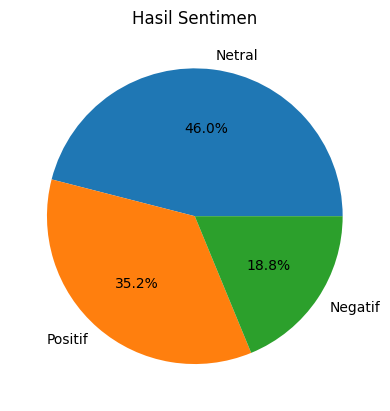

In [ ]:
import matplotlib.pyplot as plt

sentimen = data['sentimen'].value_counts()

plt.pie(sentimen, labels=sentimen.index, autopct='%1.1f%%')
plt.title('Hasil Sentimen')
plt.show()